In [2]:
import os,tqdm
import cPickle,json
import numpy as np
#prefix = '/ivi/ilps/personal/xli/knowledge_intent/data/'
prefix = '/deeperpool/lixs/knowledge_intent/data/'
session_data = json.load(open(prefix + 'session.json'))
qdid2text_dict = json.load(open(prefix + 'qdid2text_dict.json'))
(qid2eid,did2eid) = cPickle.load(open(prefix + 'qdid2eid-xlore.pkl'))

print 'loaded'
'''
session_data = [{
'sid':
'qids':[q1,q2,...],
'docs':[[(d1,c1),(d2,c2),...],[]]
},]
'''


loaded


"\nsession_data = [{\n'sid':\n'qids':[q1,q2,...],\n'docs':[[(d1,c1),(d2,c2),...],[]]\n},]\n"

In [5]:
print len(session_data)
qid_num = 0
for session in session_data:
    qid_num += len(session['qids'])
print qid_num

89737
231142


In [7]:
session_lengths = []
avg_click_per_query = []
avg_doc_per_query = []
for session in session_data:
    session_lengths.append(len(session['qids']))
    for doc_list in session['docs']:
        click_count = 0
        for d,c in doc_list:
            click_count += int(c)
        avg_click_per_query.append(click_count)
        avg_doc_per_query.append(len(doc_list))
print('avg query per session: ', np.mean(session_lengths))
print('avg_click_per_query: ', np.mean(avg_click_per_query))
print('avg_doc_per_query: ', np.mean(avg_doc_per_query))

('avg query per session: ', 2.5757714209300513)
('avg_click_per_query: ', 1.255163492571666)
('avg_doc_per_query: ', 9.58208806707565)


In [10]:
from collections import defaultdict
qent_count,dent_count = defaultdict(lambda:0),defaultdict(lambda:0)
qent_count_list, dent_count_list = [], []
for session in session_data:
    for qid in session['qids']:
        qent_count[len(qid2eid[qid])] += 1
        qent_count_list.append(len(qid2eid[qid]))
    for doc_list in session['docs']:
        for did,c in doc_list:
            dent_count[len(did2eid[did])] += 1
            dent_count_list.append(len(did2eid[did]))

print('avg ent in query: ', np.mean(qent_count_list))
print('avg ent in doc: ', np.mean(dent_count_list))
        
q_sum = sum(qent_count.values())
d_sum = sum(dent_count.values())
for q in qent_count:
    qent_count[q] = float(qent_count[q])/q_sum
for d in dent_count:
    dent_count[d] = float(dent_count[d])/d_sum
print dict(qent_count)  
print dict(dent_count)

('avg ent in query: ', 2.278962715560132)
('avg ent in doc: ', 4.030423198603229)
{0: 0.058505161329399244, 1: 0.29412655423938533, 2: 0.24135379982867675, 3: 0.20691176852324544, 4: 0.11412032430280952, 5: 0.08498239177648372}
{0: 0.009587673597393561, 1: 0.044101944037966016, 2: 0.11920320495136631, 3: 0.10612315295624075, 4: 0.17537473649135846, 5: 0.5456092879656749}


In [2]:
from collections import defaultdict
session_data_length = defaultdict(lambda:0)
for session in session_data:
    session_data_length[len(session['qids'])] += 1
print session_data_length

defaultdict(<function <lambda> at 0x7f9f1ef1e5f0>, {2: 56669, 3: 21806, 4: 7005, 5: 2518, 6: 953, 7: 432, 8: 199, 9: 108, 10: 47})


In [2]:
prefix_data_addr = '/ivi/ilps/personal/xli/knowledge_intent/entity/'
(ent2id, id2ent) = cPickle.load(open(prefix_data_addr + 'raw-xlore.ent_dict.pkl'))

In [4]:
def loadNeigbor(step):
    print 'run'
    addr = '/ivi/ilps/personal/xli/knowledge_intent/data/neib_%d.txt' % step
    neib_dict = {};
    for line in tqdm.tqdm(open(addr)):
        elements = line.strip().split('\t')
        neib_dict[(elements[0],elements[1])] = int(elements[2])
    return neib_dict

neib_dict1 = loadNeigbor(1)

31784it [00:00, 264677.08it/s]

run


135814it [00:00, 430686.72it/s]


In [40]:
eid = ent2id['lol']
print eid

bdc21630


In [28]:
for k_p in neib_dict1:
    if eid in k_p:
        print k_p

('bdc1373', 'bdi6434616')
('bdc1373', 'bdc20819')
('bdc1373', 'bdi6552377')
('bdc1373', 'bdi6098368')
('bdc1373', 'bdc20210')
('bdc13494', 'bdc1373')


In [41]:
eid2 = ent2id['腾讯游戏']#腾讯游戏
print eid2

bdc26762


In [16]:
for k_p in neib_dict1:
    if eid2 in k_p:
        print k_p

('bdc2780', 'bdc11522')
('bdc2780', 'bdc15006')
('bdc2780', 'bdi3789493')
('bdi487324', 'bdc2780')
('bdc2780', 'bdc30125')
('bdc3387', 'bdc2780')
('bdc2780', 'bdc29263')
('bdc2780', 'bdc15802')
('bdc2780', 'bdc6655')
('bdc2780', 'bdc7948')
('bdc2780', 'bdc28922')
('bdc2780', 'bdc13411')
('bdc2780', 'bdi4245355')
('bdc2780', 'bdc16163')
('bdc2780', 'bdc27284')
('bdc2780', 'bdi5768790')
('bdc2780', 'bdi4100583')
('bdc2780', 'bdi5763491')
('bdc2780', 'bdi6882533')
('bdc2780', 'bdi4206555')


In [10]:
ent_graph = cPickle.load(open(prefix + '../entity/ent-graph.pkl'))

In [42]:
s1 = list(ent_graph.neighbors(eid))
s2 = list(ent_graph.neighbors(eid2))
common = set.intersection(*map(set, [s1,s2]))
if eid in s2 or eid2 in s1:
    print 'niubi'

In [43]:
for eid in common:
    print id2ent[eid]

盲僧


In [4]:
test_session_data = json.load(open(prefix + 'test_session.json'))
(qid2eid,did2eid) = cPickle.load(open(prefix + 'test_data/qdid2eid-xlore-test.pkl'))
qdid2text_dict = json.load(open(prefix + 'test_data/qdid2text_dict-test.json'))

In [5]:
#test_type_dict = cPickle.load(open(prefix + './test_type_dict.pkl'))
query_level_dict = cPickle.load(open(prefix + 'query_level_dict200.pkl'))

In [17]:
from collections import defaultdict

stype_count = defaultdict(lambda:0)
for sid,stypes in query_level_dict.iteritems():
    for st in stypes:
        stype_count[st] += 1

print stype_count
    

defaultdict(<function <lambda> at 0x7fd65af5dde8>, {1: 258, 2: 195, 3: 261})


[[0.82105263 0.06315789 0.11578947]
 [0.125      0.75       0.125     ]
 [0.14444444 0.06666667 0.78888889]]


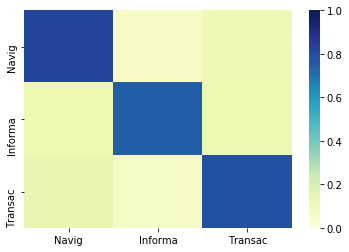

In [18]:
import seaborn as sns
import numpy as np
transform_matrix = np.zeros((3,3))
for sid,stypes in query_level_dict.iteritems():
    for i in xrange(len(stypes)- 1):
        x = stypes[i] - 1
        y = stypes[i+1] - 1
        transform_matrix[x,y] += 1

for i in range(3):
    row_sum = np.sum(transform_matrix[i])
    transform_matrix[i] /= row_sum
print transform_matrix
labels = ['Navig','Informa','Transac']
ax = sns.heatmap(transform_matrix,vmin=0, vmax=1,cmap="YlGnBu",xticklabels=labels,yticklabels=labels)

In [13]:

import scipy.stats as stats
session_length = {1:[],2:[],3:[]}

for session in tqdm.tqdm(test_session_data):
    sid = session['sid']
    s_type = test_type_dict[sid]
    
    session_length[s_type].append(len(session['qids']))
    
for k,v in session_length.iteritems():
    print k,np.mean(v)

print stats.ttest_ind(session_length[1],session_length[2])
print stats.ttest_ind(session_length[1],session_length[3])
print stats.ttest_ind(session_length[2],session_length[3])

100%|██████████| 1583/1583 [00:00<00:00, 269726.33it/s]

1 4.137566137566138
2 3.318359375
3 3.2510822510822512
Ttest_indResult(statistic=6.520511809433229, pvalue=1.1743139644148238e-10)
Ttest_indResult(statistic=7.962095133100028, pvalue=4.299564837820682e-15)
Ttest_indResult(statistic=0.7114682743454018, pvalue=0.47693203499670855)


In [43]:
word_per_query = {1:[],2:[],3:[]}
entity_per_query = {1:[],2:[],3:[]}
#print qdid2text_dict
for session in tqdm.tqdm(test_session_data[:200]):
    sid = session['sid']
    #s_type = test_type_dict[sid]
    s_types = query_level_dict[sid]
    if len(s_types) != len(session['qids']):
        print sid
    for i,qid in enumerate(session['qids']):
        s_type = s_types[i]
        words_num = len(qdid2text_dict[qid].split(' '))
        word_per_query[s_type].append(words_num)
        entity_per_query[s_type].append(len(qid2eid[qid]))
for k,v in word_per_query.iteritems():
    print k,('query: %f' % np.mean(v)), ('entity: %f' % np.mean(entity_per_query[k]))

100%|██████████| 200/200 [00:00<00:00, 28591.03it/s]

1 query: 3.503876 entity: 2.631783
2 query: 3.507692 entity: 2.471795
3 query: 3.383142 entity: 2.632184


In [20]:
click_per_query = {1:[],2:[],3:[]}
for session in tqdm.tqdm(test_session_data[:200]):
    sid = session['sid']
    docs = session['docs']
    qids = session['qids']
    #s_type = test_type_dict[sid]
    s_types = query_level_dict[sid]
    for i,(qid,dids) in enumerate(zip(qids,docs)):
        click_num = 0
        s_type = s_types[i]
        for pos,(did,click) in enumerate(dids):
            click_num += int(click)
        click_per_query[s_type].append(click_num)
for k,v in click_per_query.iteritems():
    print k,np.mean(v)

100%|██████████| 200/200 [00:00<00:00, 18855.47it/s]

1 0.9302325581395349
2 1.4923076923076923
3 1.2720306513409962


In [22]:
click_position = {1:[],2:[],3:[]}
for session in tqdm.tqdm(test_session_data[:200]):
    sid = session['sid']
    docs = session['docs']
    qids = session['qids']
    #s_type = test_type_dict[sid]
    s_types = query_level_dict[sid]
    for i,(qid,dids) in enumerate(zip(qids,docs)):
        s_type = s_types[i]
        for pos,(did,click) in enumerate(dids):
            if int(click) != 0:
                click_position[s_type].append(pos+1)

for k,v in click_position.iteritems():
    print k,np.mean(v)

100%|██████████| 200/200 [00:00<00:00, 13552.09it/s]

1 1.978021978021978
2 2.5051020408163267
3 2.222689075630252


In [33]:
delta_entity_per_query = {1:[],2:[],3:[]}
def get_new_entity(ent1,ent2):
    num = 0
    for e in ent2:
        if e not in ent1:
            num += 1
    return num
for session in tqdm.tqdm(test_session_data):
    sid = session['sid']
    qids = session['qids']
    s_type = test_type_dict[sid]
    for i,qid in enumerate(qids[:-1]):
        delta_entity_per_query[s_type].append(get_new_entity(qid2eid[qids[i]],qid2eid[qids[i+1]]))

for k,v in delta_entity_per_query.iteritems():
    print k,np.mean(v)

100%|██████████| 1583/1583 [00:00<00:00, 73064.42it/s]

1 0.8920741989881956
2 1.1524852569502948
3 1.1993589743589743


In [29]:
withcommon_percent = {1:[],2:[],3:[]}
def check_common(ent1,ent2):
    num = 0
    for e in ent2:
        if e in ent1:
            num += 1
    return 1 if num > 0 else 0

for session in tqdm.tqdm(test_session_data):
    sid = session['sid']
    qids = session['qids']
    s_type = test_type_dict[sid]
    for i,qid in enumerate(qids[:-1]):
        withcommon_percent[s_type].append(check_common(qid2eid[qids[i]],qid2eid[qids[i+1]]))

for k,v in withcommon_percent.iteritems():
    print k,np.mean(v)

  0%|          | 0/1583 [00:00<?, ?it/s]


NameError: name 'test_type_dict' is not defined

In [15]:
def check_common(ent1,ent2):
    num = 0
    for e in ent2:
        if e in ent1:
            return 1
    return 0

def check_common(ent1s,ent2s):
    has_same = 0
    for e1 in ent1s:
        for e2 in ent2s:
            if e1 == e2:
                #continue
                has_same = 1
    return has_same

withcommon_percent_click = {1:[],2:[],3:[]}
for session in tqdm.tqdm(test_session_data[:200]):
    sid = session['sid']
    docs = session['docs']
    qids = session['qids']
    
    #s_type = test_type_dict[sid]
    if sid in query_level_dict:
        s_types = query_level_dict[sid]

    for i,(qid,dids) in enumerate(zip(qids,docs)):
        click_num = 0
        s_type = s_types[i]
        query_ents = qid2eid[qid]
        if len(query_ents) == 0:
            continue
        for pos,(did,click) in enumerate(dids):
            did_entlist = did2eid[did]
            if len(did_entlist) == 0:
                continue
            if int(click) != 0:
                withcommon_percent_click[s_type].append(check_common(query_ents,did_entlist))

for k,v in withcommon_percent_click.iteritems():
    #print v
    print k,np.mean(v)
                

100%|██████████| 200/200 [00:00<00:00, 7693.50it/s]

1 0.7398843930635838
2 0.8134715025906736
3 0.7081545064377682


In [9]:
def loadNeigborRelation(step):
    print 'run'
    addr = '/ivi/ilps/personal/xli/knowledge_intent/data/neib_%d_relation.txt' % step
    neib_dict = {};
    for line in tqdm.tqdm(open(addr)):
        elements = line.strip().split('\t')
        relations = map(int,elements[-1].split('#'))
        neib_dict[(elements[0],elements[1])] = (int(elements[2]),relations)
        #break
    return neib_dict

relation_dict1 = loadNeigborRelation(1)
relation_dict2 = loadNeigborRelation(2)

2904it [00:00, 29039.68it/s]

run


135814it [00:01, 115261.98it/s]
5765it [00:00, 57638.51it/s]

run


42119584it [04:03, 172732.36it/s]


In [10]:
def gethops(ent1s,ent2s):
    hops = []
    derivation = 0
    equal = 0
    has_same = 0
    for e1 in ent1s:
        for e2 in ent2s:
            if e1 == e2:
                #continue
                has_same = 1
                hops.append(0)
            else:
                if (e1,e2) in relation_dict1 or (e2,e1) in relation_dict1:
                    ent1 = e1;ent2 = e2
                    if (e1,e2) not in relation_dict1:
                        ent2 = e1;ent1 = e2s
                        
                    hops.append(1)
                    for r in relation_dict1[(ent1,ent2)][1]:
                        #print 'runhere'
                        if r == 1 or r == 2:
                            derivation += 1
                        else:
                            equal += 1
                elif (e1,e2) in relation_dict2 or (e2,e1) in relation_dict2:
                    ent1 = e1;ent2 = e2
                    if (e1,e2) not in relation_dict2:
                        ent2 = e1;ent1 = e2s
                        
                    hops.append(2)
                    for r in relation_dict2[(ent1,ent2)][1]:
                        if r == 1 or r == 2:
                            derivation += 1
                        else:
                            equal += 1
                #else:
                #    hops.append(0)
    total_r = derivation + equal
    if len(hops) == 0:
        avg_hops = 0
    else:
        avg_hops = np.mean(hops)
    if total_r == 0:
        return avg_hops,0,0,has_same
    return avg_hops,float(derivation)/total_r, float(equal)/total_r,has_same
                    

In [11]:
hops_query = {1:[],2:[],3:[]}
derivation_query = {1:[],2:[],3:[]}
for session in tqdm.tqdm(test_session_data):
    sid = session['sid']
    qids = session['qids']
    docs = session['docs']
    s_type = test_type_dict[sid]
                
    for i,qid in enumerate(qids[:-1]):
        hops,d,_,_ = gethops(qid2eid[qids[i]],qid2eid[qids[i+1]])
        
        if hops > 0:
            hops_query[s_type].append(hops)
            derivation_query[s_type].append(d)

for k,v in hops_query.iteritems():
    print k,('avg hops: %f' % np.mean(v)),('derivation: %f' % np.mean(derivation_query[k]))

  0%|          | 0/1583 [00:00<?, ?it/s]


NameError: name 'test_type_dict' is not defined

In [16]:
hops_click = {1:[],2:[],3:[]}
derivation_click = {1:[],2:[],3:[]}
for session in tqdm.tqdm(test_session_data[:200]):
    sid = session['sid']
    qids = session['qids']
    #s_type = test_type_dict[sid]
    docs = session['docs']
    s_types = query_level_dict[sid]
    for i,(qid,dids) in enumerate(zip(qids,docs)):
        click_num = 0
        s_type = s_types[i]
        query_ents = qid2eid[qid]
        if len(query_ents) == 0:
            continue           
                
        for pos,(did,click) in enumerate(dids):
            if int(click) != 0:
                did_entlist = did2eid[did]
                if len(did_entlist) == 0:
                    continue
                
                hops,d,_,_ = gethops(query_ents,did2eid[did])
                hops_click[s_type].append(hops)
                if hops > 0:
                    
                    derivation_click[s_type].append(d)
                
        

for k,v in hops_click.iteritems():
    print k,('avg hops: %f' % np.mean(v)),('derivation: %f' % np.mean(derivation_click[k]))

100%|██████████| 200/200 [00:00<00:00, 5313.79it/s]

1 avg hops: 0.795665 derivation: 0.973457
2 avg hops: 0.349847 derivation: 0.904948
3 avg hops: 0.540389 derivation: 0.945980


In [17]:
def cal_pr(ent1s,ent2s,step):
    ent1s = list(set(ent1s))
    ent2s = list(set(ent2s))
    if step == 0:
        common = float(len(set.intersection(*map(set, [ent1s,ent2s]))))
        recall = common / (len(ent2s) + 1)
    else:
        p_count = 0;r_total = len(ent1s)
        for ent in ent1s:
            if ent in ent2s:
                p_count += 1
                continue
            for d_ent in ent2s:
                if step == 1:
                    if (ent,d_ent) in relation_dict1 or (d_ent,ent) in relation_dict1:
                        p_count += 1
                if step == 2:
                    if (ent,d_ent) in relation_dict1 or (d_ent,ent) in relation_dict1 or\
                            (ent,d_ent) in relation_dict2 or (d_ent,ent) in relation_dict2:
                        p_count += 1
                    

        recall = float(p_count) / (len(ent2s) + 1)
        #prec = float(p_count) / (r_total + 1)
    return recall

In [20]:
def click_calculation(step):
    click_ratio = [[],[],[]]
    for session in tqdm.tqdm(test_session_data[:200]):
        sid = session['sid']
        qids = session['qids']
        docs = session['docs']
        s_types = query_level_dict[sid]
        
        for i,(qid,dids) in enumerate(zip(qids,docs)):
            qid_entlist = qid2eid[qid]
            q_size = len(qid_entlist)
            if len(qid_entlist) == 0:
                continue  
            #print s_types, sid
            s_type = s_types[i]
            for pos,(did,click) in enumerate(dids):
                did_entlist = did2eid[did]
                if len(did_entlist) == 0:
                    continue 
                r = cal_pr(qid_entlist,did_entlist,step)
                if click != 0:
                    click_ratio[s_type-1].append(r)

    
    print 'Step: ', step
    results = []
    for i in range(3):
        results.append(np.mean(click_ratio[i]) )
        print 'Click recall: ', np.mean(click_ratio[i]) 
    return click_ratio,results

click_ratio0,r0 = click_calculation(0)

100%|██████████| 200/200 [00:00<00:00, 4411.41it/s]

Step:  0
Click recall:  0.3008670520231214
Click recall:  0.27702936096718483
Click recall:  0.2701716738197425


In [21]:
click_ratio1,r1 = click_calculation(1)
click_ratio2,r2 = click_calculation(2)

100%|██████████| 200/200 [00:00<00:00, 2015.50it/s]

Step:  1
Click recall:  0.30953757225433526
Click recall:  0.28134715025906737
Click recall:  0.2873390557939914
Step:  2
Click recall:  0.4032755298651252
Click recall:  0.3207253886010363
Click recall:  0.38605150214592276


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150 #分辨率
df = pd.DataFrame({"Hops": [0,1,2],
                   "Navigational":[r0[0],r1[0],r2[0]],
                   "Informational": [r0[1],r1[1],r2[1]], 
                   "Transactional": [r0[2],r1[2],r2[2]]})
print df

fig, ax = plt.subplots()
tidy = df.melt(id_vars='Hops').rename(columns=str.title)

sns.set(style="white")
ax.set(ylim=(0, 0.5))
g = sns.barplot(x='Hops', y='Value', hue='Variable', data=tidy, ax=ax,
                palette="muted",hue_order=['Navigational','Informational','Transactional'])
sns.despine(fig)


#for index, row in df.iterrows():
#    print index,row
#    #g.text(row.name,row.Value, round(row.total_bill,2), color='black', ha="center")
for p in ax.patches:
	ax.annotate("%.4f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()-0.01),
		ha='center', va='center', fontsize=9, color='black', xytext=(0, 20),
		textcoords='offset points')
    
# Create a second y-axis with the scaled ticks
ax.legend().set_title('')
ax.set_ylabel('Ratio')
plt.show()

In [7]:

def check_common(ent1s,ent2s):
    common = float(len(set.intersection(*map(set, [ent1s,ent2s]))))
    return float(common) / len(ent1s)

query_percent_click = {1:[],2:[],3:[]}

for session in tqdm.tqdm(test_session_data[:200]):
    sid = session['sid']
    qids = session['qids']
    docs = session['docs']
    #s_type = test_type_dict[sid]
    
    s_types = query_level_dict[sid]
    for i,(qid,dids) in enumerate(zip(qids,docs)):
        click_num = 0
        s_type = s_types[i]
        qid_entlist = qid2eid[qid]
        
        if len(qid_entlist) == 0:
            continue           
                
        for pos,(did,click) in enumerate(dids):
            did_entlist = did2eid[did]
            if int(click) != 0:
                if len(did_entlist) == 0:
                    continue
                percent = check_common(qid_entlist,did_entlist)
                query_percent_click[s_type].append(percent)
for k,v in query_percent_click.iteritems():
    print k,np.mean(v)

100%|██████████| 200/200 [00:00<00:00, 10985.32it/s]

1 0.5358381502890173
2 0.6385146804835923
3 0.49148783977110155
